In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# Importing Libraries and Data

In [2]:
!pip install statsmodels

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [5]:
df = pd.read_csv('/content/Gold Price Prediction.csv')
df.head()

,Date,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Day Moving Average,...,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Curve Rates (10 Yr),DXY,SP Open,VIX,Crude
0,8/7/24,2405.87,2384.90,2385.83,NaN,NaN,NaN,30.155078,2414.7450,2368.2948,...,3.0,5.33,96,5.50,4.00,3.96,103.37,5293.13,24.77,72.84
1,8/6/24,2442.74,2405.87,2384.90,2385.83,0.93,NaN,29.423936,2414.1525,2367.7916,...,3.0,5.33,89,5.50,3.99,3.90,102.78,5206.42,33.71,73.86
2,8/5/24,2447.17,2442.74,2405.87,2384.90,-20.97,NaN,28.341301,2413.2305,2367.1584,...,3.0,5.33,86,5.52,3.89,3.78,103.22,5151.14,23.39,74.21
3,8/2/24,2447.23,2447.17,2442.74,2405.87,-36.87,NaN,28.616661,2411.0920,2365.7250,...,3.0,5.33,89,5.54,3.88,3.80,104.31,5376.63,20.52,76.87
4,8/1/24,2411.09,2447.23,2447.17,2442.74,-4.43,NaN,26.084796,2408.5670,2363.5624,...,3.0,5.33,83,5.55,4.16,3.99,104.07,5537.84,16.20,78.59


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Date                                    676 non-null    object 
 1   Price 2 Days Prior                      676 non-null    float64
 2   Price 1 Day Prior                       676 non-null    float64
 3   Price Today                             676 non-null    float64
 4   Price Tomorrow                          675 non-null    float64
 5   Price Change Tomorrow                   675 non-null    float64
 6   Price Change Ten                        666 non-null    float64
 7   Std Dev 10                              667 non-null    float64
 8   Twenty Moving Average                   676 non-null    float64
 9   Fifty Day Moving Average                676 non-null    float64
 10  200 Day Moving Average                  676 non-null    float6

In [7]:
df.describe()

,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Day Moving Average,200 Day Moving Average,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Curve Rates (10 Yr),DXY,SP Open,VIX,Crude
count,676.000000,676.000000,676.000000,675.000000,675.000000,666.000000,667.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,1956.236228,1957.114305,1957.937944,1958.165600,0.861570,8.944414,20.995813,1924.073017,1871.380976,1622.592107,5.410355,3.680621,94.670118,3.892293,3.977944,3.648092,103.845251,4419.902308,19.881361,84.382929
std,192.959980,193.560530,194.198338,194.252056,17.531773,55.681937,10.470747,265.468530,345.304237,540.444267,2.248175,2.000887,15.576974,1.996601,1.074036,0.766838,3.444444,499.216045,6.054484,11.856576
min,1627.040000,1627.040000,1627.040000,1627.040000,-81.890000,-124.290000,5.587177,90.213500,36.085400,9.021350,3.000000,0.080000,41.000000,0.020000,0.770000,1.630000,94.870000,3520.370000,11.530000,66.620000
25%,1823.587500,1824.490000,1824.490000,1824.880000,-9.100000,-29.540000,13.668920,1827.777875,1798.103600,1567.168475,3.200000,2.330000,83.000000,2.367500,3.400000,3.267500,102.297500,4025.432500,14.235000,76.555000
50%,1930.910000,1931.405000,1931.515000,1931.590000,0.660000,2.870000,18.307964,1927.932750,1919.624800,1814.988850,4.900000,4.830000,95.000000,4.700000,4.360000,3.810000,103.990000,4343.605000,19.070000,81.025000
75%,2021.452500,2022.290000,2023.977500,2024.075000,10.870000,42.332500,25.866758,2010.718500,1993.311900,1954.031825,7.900000,5.330000,104.000000,5.510000,4.730000,4.230000,105.390000,4715.932500,24.050000,88.765000
max,2469.650000,2469.650000,2469.650000,2469.650000,66.660000,186.170000,62.183588,2414.745000,2368.294800,2189.807800,9.100000,5.330000,144.000000,6.020000,5.190000,4.980000,114.190000,5644.090000,37.500000,124.660000


In [8]:
df.isnull().sum()

,0
Date,0
Price 2 Days Prior,0
Price 1 Day Prior,0
Price Today,0
Price Tomorrow,1
Price Change Tomorrow,1
Price Change Ten,10
Std Dev 10,9
Twenty Moving Average,0
Fifty Day Moving Average,0


In [9]:
# Handling missing values
df = df.dropna()
df.isnull().sum()

,0
Date,0
Price 2 Days Prior,0
Price 1 Day Prior,0
Price Today,0
Price Tomorrow,0
Price Change Tomorrow,0
Price Change Ten,0
Std Dev 10,0
Twenty Moving Average,0
Fifty Day Moving Average,0


# Exploratory Data Analysis (EDA)

### 1. Correlation map

In [10]:
# One- hot encoding

df = pd.get_dummies(df)

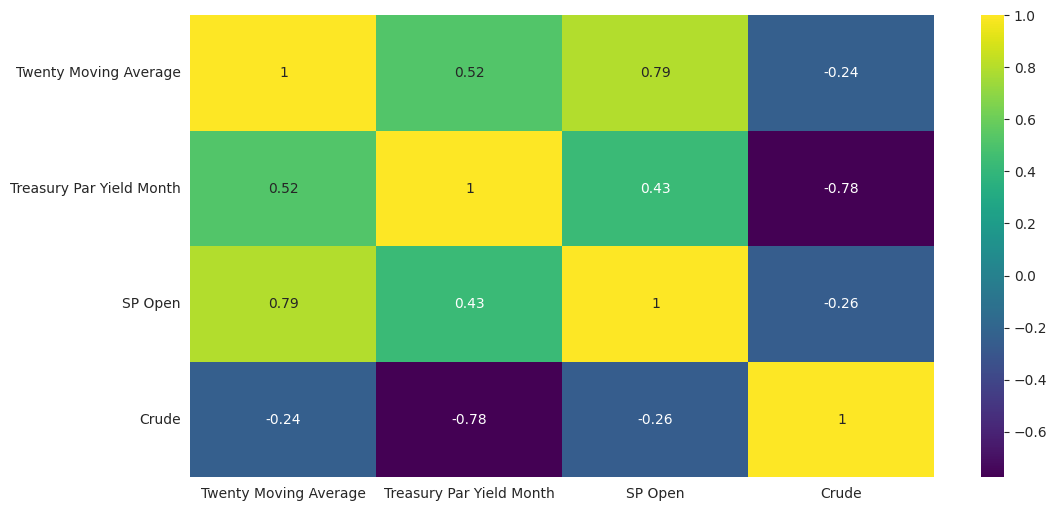

In [11]:
# Correlation analysis
corr_columns = ['Twenty Moving Average', 'Treasury Par Yield Month', 'SP Open', 'Crude']
df_corr = df[corr_columns].corr()

plt.figure(figsize = (12,6))
sns.heatmap(df_corr, annot = True, cmap = 'viridis')
plt.show()

### 2. Time Series Decomposition

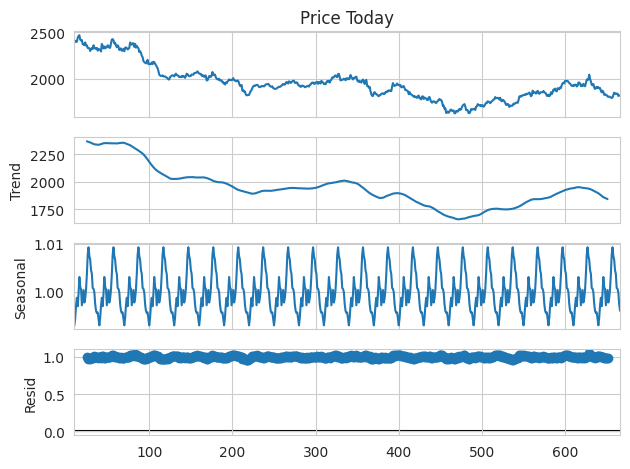

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Price Today'], model ='multiplicative', period = 30)
decomposition.plot()
plt.show()

### 4. Rolling Mean and Standard Deviation

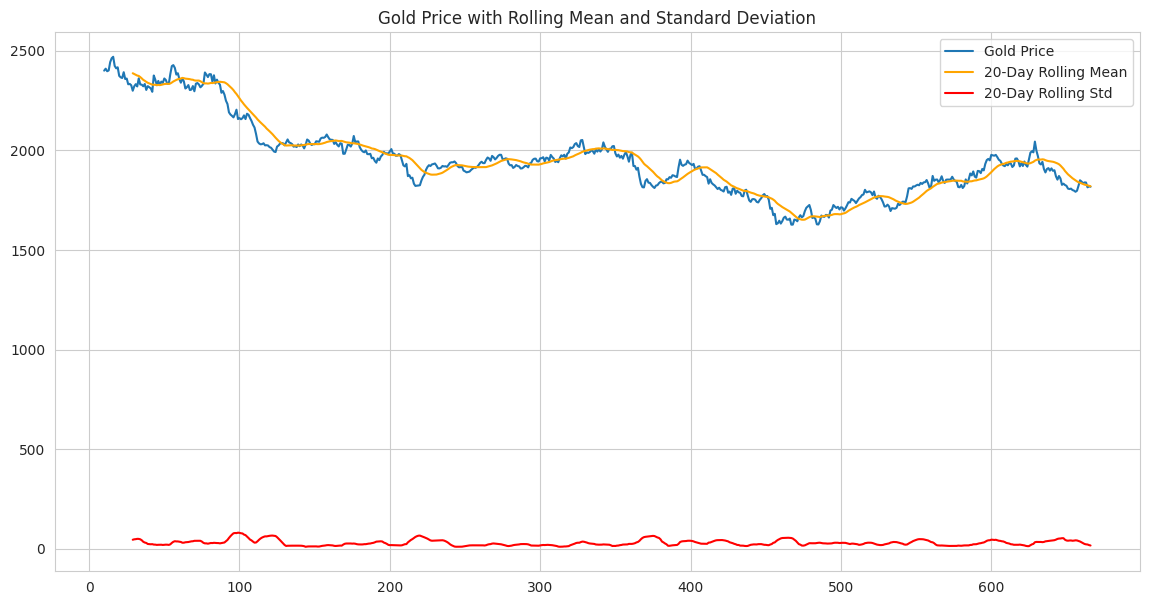

In [13]:
df['Rolling Mean'] = df['Price Today'].rolling(window=20).mean()
df['Rolling Std'] = df['Price Today'].rolling(window=20).std()


# Plot rolling statistics
plt.figure(figsize=(14, 7))
plt.plot(df['Price Today'], label='Gold Price')
plt.plot(df['Rolling Mean'], label='20-Day Rolling Mean', color='orange')
plt.plot(df['Rolling Std'], label='20-Day Rolling Std', color='red')
plt.title('Gold Price with Rolling Mean and Standard Deviation')
plt.legend()
plt.show()

### 5. Distribution of Price Changes

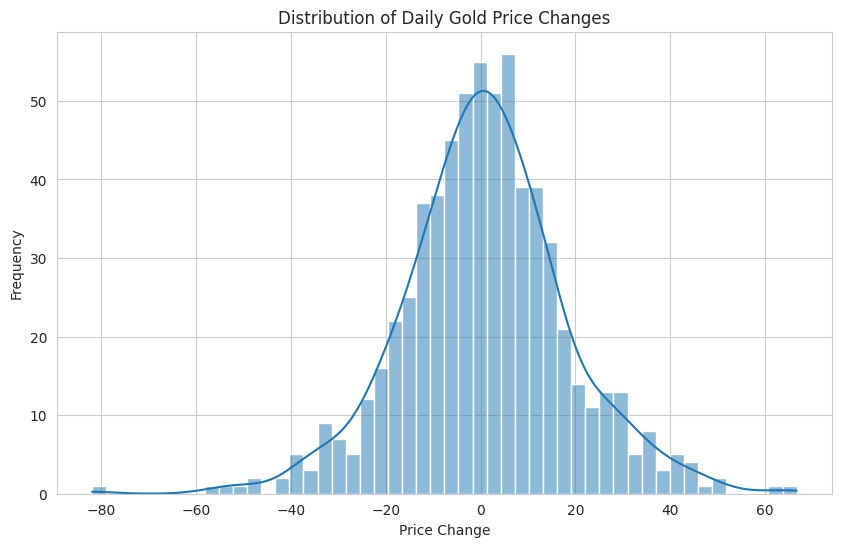

In [14]:
df['Price Change'] = df['Price Today'] - df['Price 1 Day Prior']

# Plot the distribution of price changes
plt.figure(figsize=(10, 6))
sns.histplot(df['Price Change'], bins=50, kde=True)
plt.title('Distribution of Daily Gold Price Changes')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.show()

### 6. Seasonality Analysis

In [15]:
df.head()

,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Day Moving Average,200 Day Moving Average,...,Date_9/6/22,Date_9/6/23,Date_9/7/22,Date_9/7/23,Date_9/8/22,Date_9/8/23,Date_9/9/22,Rolling Mean,Rolling Std,Price Change
10,2397.05,2409.86,2400.12,2365.37,-34.75,-14.29,26.120482,2387.0200,2363.0558,2168.25615,...,False,False,False,False,False,False,False,NaN,NaN,-9.74
11,2400.95,2397.05,2409.86,2400.12,-9.74,-24.96,29.774000,2383.0825,2362.2280,2165.85250,...,False,False,False,False,False,False,False,NaN,NaN,12.81
12,2442.71,2400.95,2397.05,2409.86,12.81,8.82,34.370081,2379.1965,2360.8238,2163.46460,...,False,False,False,False,False,False,False,NaN,NaN,-3.90
13,2462.44,2442.71,2400.95,2397.05,-3.90,41.79,37.996575,2375.3835,2360.0924,2160.83315,...,False,False,False,False,False,False,False,NaN,NaN,-41.76
14,2469.65,2462.44,2442.71,2400.95,-41.76,4.46,38.405274,2373.4090,2358.9954,2158.20535,...,False,False,False,False,False,False,False,NaN,NaN,-19.73


### 7. Volatility vc. VIX

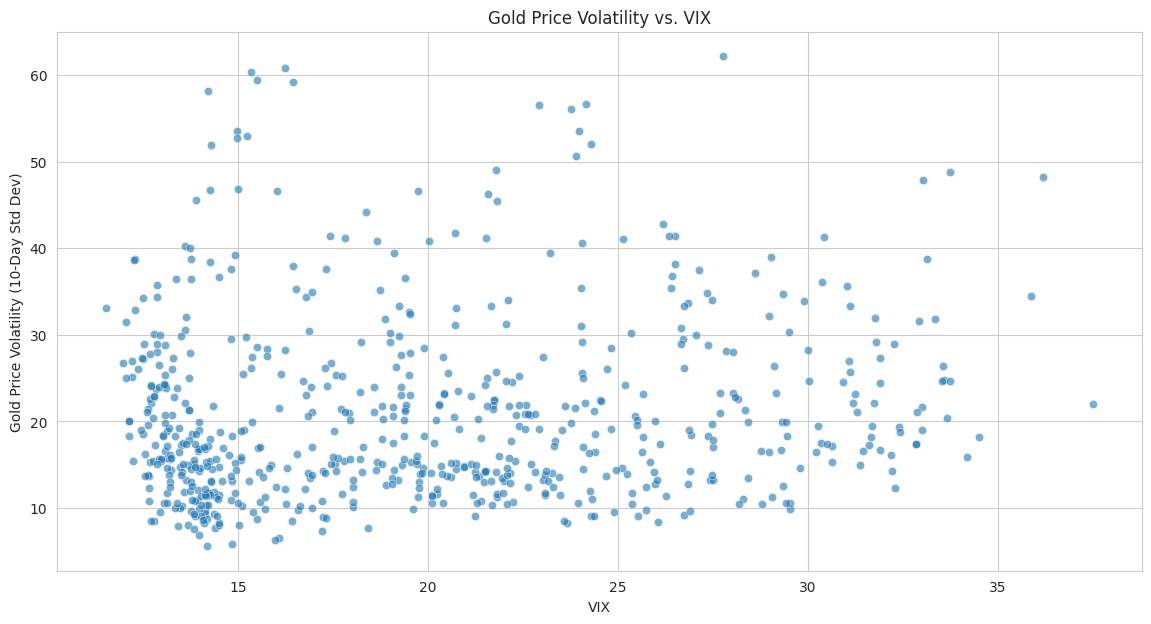

In [16]:
# Plotting Gold Price Volatility against VIX
plt.figure(figsize=(14, 7))
plt.scatter(df['VIX'], df['Std Dev 10'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Gold Price Volatility vs. VIX')
plt.xlabel('VIX')
plt.ylabel('Gold Price Volatility (10-Day Std Dev)')
plt.show()


# Model Development

In [17]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = df[['Price 1 Day Prior', 'EFFR Rate', 'DXY', 'VIX']]
y = df['Price Today']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =1)
lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse **0.5

print(f'Mae: {mae}')
print(f'Mse: {mse}')
print(f'RMSE: {rmse}')

Mae: 14.436677387584963
Mse: 359.2980603530964
RMSE: 18.95515920147062


In [18]:
# RandomForest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = mse **0.5

print(f'Mae: {mae}')
print(f'Mse: {mse}')
print(f'RMSE: {rmse}')

Mae: 15.045762878787812
Mse: 355.69432560900884
RMSE: 18.859860169391734


In [19]:
# XGB
import xgboost as xgb

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb) ** 0.5

print(f'XGBoost MAE: {mae_xgb}, RMSE: {rmse_xgb}')


XGBoost MAE: 16.169506835937497, RMSE: 20.990396312287043


In [20]:
# LSTM
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Prepare the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Price Today']])

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(scaled_data, seq_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

lstm_model.fit(X_train, y_train, batch_size=1, epochs=10)

predictions = lstm_model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

mae_lstm = mean_absolute_error(y_test, predictions)
rmse_lstm = mean_squared_error(y_test, predictions) ** 0.5

print(f'LSTM MAE: {mae_lstm}, RMSE: {rmse_lstm}')


Epoch 1/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0177
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0026
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0018
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0018
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0010
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 9.6601e-04
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 7.5094e-04
Epoch 9/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 9.7036e-04
Epoch 10/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.3199e-04
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
LSTM MAE: 1974.9190500833417, RMSE: 1985.2698039525615
